# O Modelo de Precificação de Ativos (CAPM)

## Introdução

O Modelo de Precificação de Ativos, conhecido como CAPM (do inglês, Capital Asset Pricing Model), é uma das teorias mais fundamentais no campo da finança, essencial para a avaliação e precificação de ativos financeiros. Neste artigo, iremos mostrar como é possível analisar o CAPM para o Mercado Brasileiro usando o Python.

Desenvolvido por William Sharpe em 1964 e aprimorado por John Lintner e Jan Mossin, o CAPM desempenha um papel crucial na tomada de decisões de investimento, fornecendo uma estrutura para estimar o retorno exigido de um ativo com base em seu risco sistêmico.

## Pressupostos

Para aplicar o CAPM de forma eficaz, é essencial entender seus pressupostos fundamentais:

### 1. Mercados Eficientes
O CAPM parte do pressuposto de que os mercados financeiros são eficientes, o que significa que todas as informações relevantes estão prontamente disponíveis e refletidas nos preços dos ativos. Portanto, os investidores não podem obter lucros anormais explorando informações privilegiadas.

### 2. Investidores Racionais
O modelo presume que todos os investidores são racionais e tomam decisões de investimento com base na maximização de seus retornos esperados e minimização de seus riscos.

### 3. Ativos Negociáveis
O CAPM se aplica apenas a ativos financeiros negociáveis, como ações e títulos, em vez de ativos reais, como imóveis ou arte.

### 4. Impostos e Taxas

Não há impostos, taxas ou quaisquer outras restrições para os investimentos no mercado;

## CAPM

O Modelo de Precificação de Ativos (CAPM) estabelece a relação entre o retorno esperado de um ativo financeiro e seu risco sistêmico, medido pelo famoso coeficiente beta (β). O CAPM é formulado pela seguinte equação:

$$ E(R_i) = R_f + \beta_i (E(R_m) - R_f) $$

- $E(R_i)$: Retorno esperado do ativo.
- $R_f$: Taxa livre de risco (geralmente baseada em títulos do governo).
- $\beta_i$: Coeficiente beta do ativo, que mede seu risco sistemático em relação ao mercado.
- $E(R_m)$: Retorno esperado do mercado.
- $E(R_m) - R_f$: Prêmio de risco de mercado.

## Beta

- Um ativo com $ \beta = 1 $ é considerado tão volátil quanto o mercado. Isso significa que, em média, ele se move na mesma direção e na mesma proporção que o mercado.

- Um ativo com $ \beta > 1 $ é considerado mais volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos maiores do que o mercado.

- Um ativo com $ \beta < 1 $ é considerado menos volátil que o mercado. Isso significa que, em média, ele tende a ter movimentos menores do que o mercado.

- Um ativo com $ \beta = 0 $ é considerado não relacionado ao mercado. Isso significa que seus retornos são independentes dos movimentos do mercado.

Podemos estimar o Beta a partir da seguinte fórmula:

$$ \beta = \frac{{\text{Covariância}(R_i, R_m)}}{{\text{Variância}(R_m)}} $$

Assim, podemos obter a estimativa pela forma manual, calculando a covariância e a variância, ou usando funções para o cálculo do MQO.

# Criando o CAPM no Python

# CDI

In [ ]:
!pip install python-bcb

In [ ]:
from bcb import sgs
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.regression.rolling import RollingOLS

## Gráficos
from plotnine import *
from mizani.breaks import date_breaks
from mizani.formatters import date_format
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
start = '2014-01-01' # início
end = '2023-10-01' # fim

In [ ]:
# CDI acumulada no mês (%a.m)
cdi_m = sgs.get({'cdi' : 4391}, start = start)

In [ ]:
cdi_m

,cdi
Date,
2014-01-01,0.84
2014-02-01,0.78
2014-03-01,0.76
2014-04-01,0.82
2014-05-01,0.86
...,...
2023-06-01,1.07
2023-07-01,1.07
2023-08-01,1.14


# Retorno do Ibovespa

In [ ]:
# Preços Históricos
precos = yf.download('^BVSP', start = start, end = end, interval = '1mo')

# Calcula Retornos Mensais
returns = (
          precos[['Adj Close']]
          .pct_change()
          .rename(columns = {'Adj Close' : 'retornos_ibov'})
          .dropna()
          )

[*********************100%%**********************]  1 of 1 completed


In [ ]:
returns

,retornos_ibov
Date,
2014-02-01,-0.011440
2014-03-01,0.070519
2014-04-01,0.024021
2014-05-01,-0.007496
2014-06-01,0.037647
...,...
2023-05-01,0.037374
2023-06-01,0.090017
2023-07-01,0.032654


In [ ]:
# Junta os data frames
returns_rf =  (
    returns.merge(cdi_m, left_index = True, right_index = True)
    .assign(cdi = lambda x: x.cdi / 100)
    )

In [ ]:
returns_rf

,retornos_ibov,cdi
Date,,
2014-02-01,-0.011440,0.0078
2014-03-01,0.070519,0.0076
2014-04-01,0.024021,0.0082
2014-05-01,-0.007496,0.0086
2014-06-01,0.037647,0.0082
...,...,...
2023-05-01,0.037374,0.0112
2023-06-01,0.090017,0.0107
2023-07-01,0.032654,0.0107


# Ativo

In [ ]:
# Tickers dos ativos
assets = ['BBDC4.SA', 'ITSA4.SA', 'VALE3.SA', 'WEGE3.SA']

# Baixa os dados (dados mensais)
precos_ativos = yf.download(assets, start = start, end = end, interval = '1mo')
precos_ativos = precos_ativos.loc[:,('Adj Close', slice(None))]
precos_ativos.columns = assets

# Calculando os retornos
Y = precos_ativos[assets].pct_change().dropna()

# Verifica os retornos
Y.head()

[*********************100%%**********************]  4 of 4 completed


,BBDC4.SA,ITSA4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2014-02-01,0.043961,0.009940,-0.001513,0.116423
2014-03-01,0.152413,0.092090,-0.047879,0.045728
2014-04-01,0.065903,0.059173,-0.059516,0.106488
2014-05-01,-0.059888,-0.038344,-0.009714,-0.033445
2014-06-01,0.027544,0.016375,0.027407,0.087658


In [ ]:
# Número de ativos
num_ativos = len(Y.columns)

# Calcula pesos iguais
peso_por_ativo = 1.0 / num_ativos
ewp = [peso_por_ativo] * num_ativos

# Pesos
ewp

[0.25, 0.25, 0.25, 0.25]

In [ ]:
# Calcula o retorno do portfólio
portfolio_returns_ewp = pd.DataFrame((Y * ewp).sum(axis = 1), columns = ['portfolio_ewp'])
portfolio_returns_ewp

,portfolio_ewp
Date,
2014-02-01,0.042203
2014-03-01,0.060588
2014-04-01,0.043012
2014-05-01,-0.035348
2014-06-01,0.039746
...,...
2023-05-01,-0.017743
2023-06-01,0.042545
2023-07-01,0.048957


In [ ]:
# Junta os dados
portfolio = (
            portfolio_returns_ewp
            .merge(returns_rf, left_index = True, right_index = True)
            )

portfolio.head()

,portfolio_ewp,retornos_ibov,cdi
Date,,,
2014-02-01,0.042203,-0.011440,0.0078
2014-03-01,0.060588,0.070519,0.0076
2014-04-01,0.043012,0.024021,0.0082
2014-05-01,-0.035348,-0.007496,0.0086
2014-06-01,0.039746,0.037647,0.0082


# Excesso de Retorno

In [ ]:
portfolio['excesso_retorno'] = portfolio['portfolio_ewp'] - portfolio['cdi']
portfolio['excesso_ibovespa'] = portfolio['retornos_ibov'] - portfolio['cdi']

portfolio.head()

,portfolio_ewp,retornos_ibov,cdi,excesso_retorno,excesso_ibovespa
Date,,,,,
2014-02-01,0.042203,-0.011440,0.0078,0.034403,-0.019240
2014-03-01,0.060588,0.070519,0.0076,0.052988,0.062919
2014-04-01,0.043012,0.024021,0.0082,0.034812,0.015821
2014-05-01,-0.035348,-0.007496,0.0086,-0.043948,-0.016096
2014-06-01,0.039746,0.037647,0.0082,0.031546,0.029447


# Regressão Linear

In [ ]:
model_fit = (smf.ols(
    formula = "excesso_retorno ~ excesso_ibovespa",
    data = portfolio)
  .fit()
)

model_fit_coefs = model_fit.summary(slim = True).tables[1]
print(model_fit_coefs)

                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0070      0.003      2.573      0.011       0.002       0.012
excesso_ibovespa     0.9120      0.041     22.253      0.000       0.831       0.993


# Gráfico de Dispersão

In [ ]:
px.scatter(data_frame = portfolio,
                      x = 'excesso_ibovespa',
                      y = 'excesso_retorno',
                      labels = {
                            "x" : "",
                            "value" : ""
                         },
                      trendline = 'ols'
                 )

# Beta Móvel

In [ ]:
def roll_capm_estimation(data, window_size, min_obs):

    result = (RollingOLS.from_formula(
      formula = "excesso_retorno ~ excesso_ibovespa",
      data = data,
      window = window_size,
      min_nobs = min_obs
      )
      .fit()
      .params["excesso_ibovespa"]
    )

    result.index = data.index
    result = pd.DataFrame(result).rename({'excesso_ibovespa' : 'beta'}, axis = 1)
    return result

In [ ]:
beta = roll_capm_estimation(data = portfolio, window_size = 60, min_obs = 48)

In [ ]:
beta.reset_index(inplace = True)
beta.dropna(inplace = True)

beta

,Date,beta
59,2019-01-01,1.005189
60,2019-02-01,1.012004
61,2019-03-01,1.015656
62,2019-04-01,1.014991
63,2019-05-01,1.012012
64,2019-06-01,1.014174
65,2019-07-01,1.013173
66,2019-08-01,1.030095
67,2019-09-01,1.048504
68,2019-10-01,1.048707


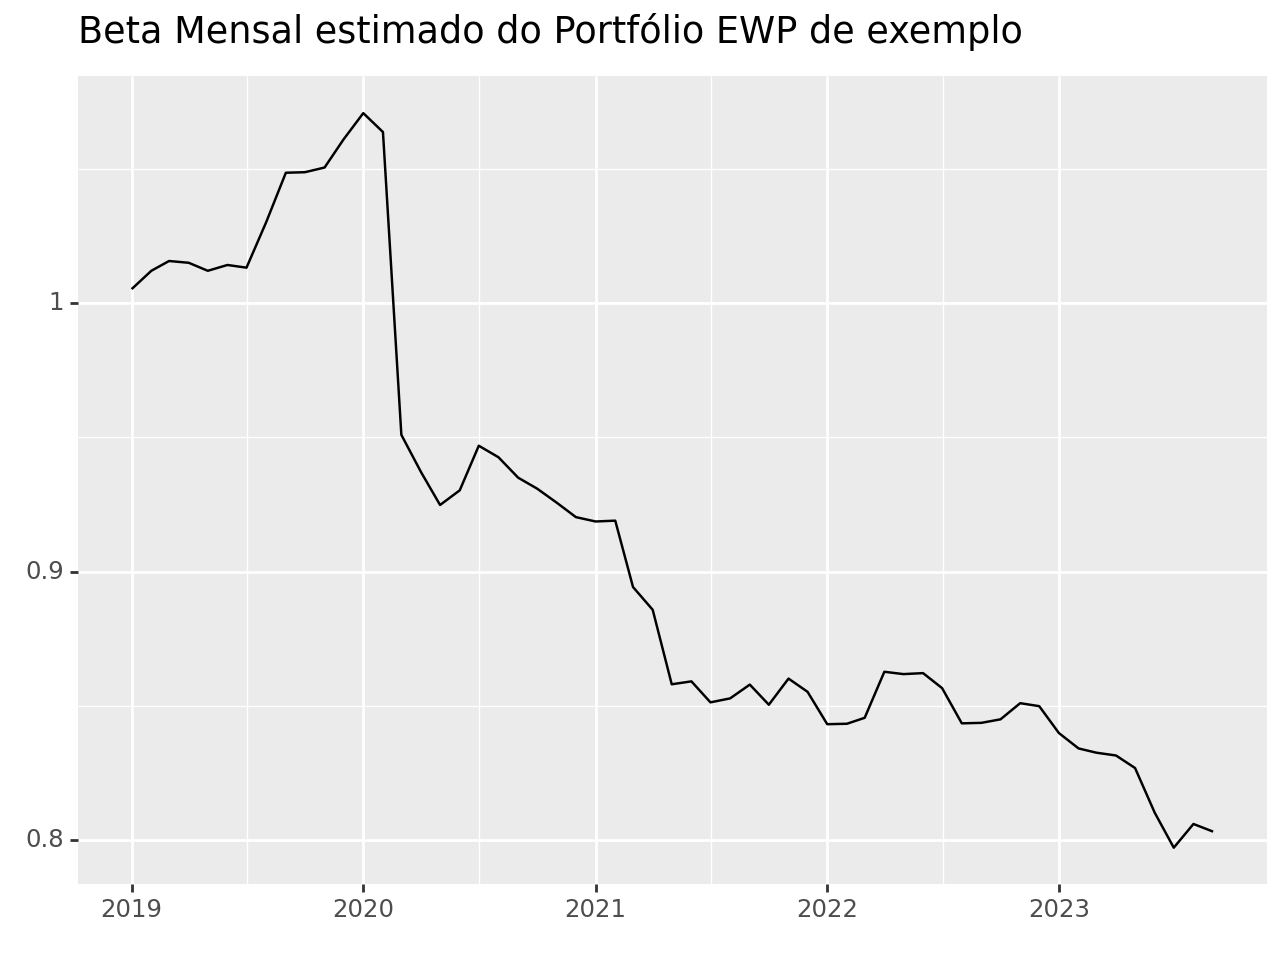

In [ ]:
plot_beta = (
  ggplot(beta,
         aes(x = "Date", y = "beta")) +
  geom_line() +
  scale_x_datetime(breaks = date_breaks("1 year"),
                   labels = date_format("%Y")) +
  labs(x = "",
       y = "",
       title = ("Beta Mensal estimado do Portfólio EWP de exemplo"))
  )


plot_beta.draw()